# **NLP Exercise Solution** 
# Wiki gender pages comparison

In [57]:
import nltk
nltk.download("names")
nltk.download("genesis")
nltk.download("inaugural")
nltk.download("nps_chat")
nltk.download("webtext")
nltk.download("treebank")
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Israeli Vs. European Startups
## Female names mentioned in wiki pages comparison

In [59]:
names=nltk.corpus.names.words()
female_names=nltk.corpus.names.words('female.txt')
male_names = nltk.corpus.names.words('male.txt')


# Analyzing Functions

In [60]:
def is_name(word):
	return True if word in names else False

def is_female_name(word):
	return True if word in female_names else False

def get_web_text(url1):
     from bs4 import BeautifulSoup
     from urllib import request
     html1 = request.urlopen(url1).read().decode('utf8')
     the_text= BeautifulSoup(html1, 'html.parser').get_text()
     return the_text

def top_names(number,text):
    txt_names=[name for name in filter(is_name,text)]
    names_freq=nltk.FreqDist(txt_names)
    top_names={}
    for name,count in names_freq.most_common(number):
        top_names[name]=count
    return top_names

def analyze_text_names(url1):
     web_text=nltk.word_tokenize(get_web_text(url1))
     all_names=[name for name in filter(is_name,web_text)]
     all_names_dict=sorted(set(all_names))
     female_names_dict=[name for name in filter(is_female_name,all_names_dict)]
    
     print("\r\n url: " + url1)
     print("\r\n percentage of female names: " + "{:.1%}".format(len(female_names_dict) / len(all_names_dict)))
     print("\r\n all names: ("+ str(len(all_names_dict))+")\r\n" + str(all_names_dict))
     print("\r\n female names: ("+str(len(female_names_dict)) +") \r\n"  + str(female_names_dict))

In [61]:
analyze_text_names("https://en.wikipedia.org/wiki/Silicon_Wadi")


 url: https://en.wikipedia.org/wiki/Silicon_Wadi

 percentage of female names: 38.8%

 all names: (49)
['Amy', 'Andrew', 'April', 'Asia', 'August', 'Ben', 'Carmel', 'Catherine', 'Charles', 'Cookie', 'David', 'Dennis', 'Diamond', 'Ellis', 'Forrester', 'French', 'George', 'Gordon', 'Guy', 'Ingrid', 'Israel', 'Jan', 'Jean-Pierre', 'June', 'Major', 'Max', 'May', 'Mustafa', 'Nick', 'Opal', 'Park', 'Powell', 'Red', 'Roy', 'Saba', 'Seamus', 'See', 'Sheba', 'Shoshana', 'Simon', 'Solomon', 'Stanford', 'Stephen', 'Thomas', 'Verge', 'Vi', 'Viva', 'Whittaker', 'Zack']

 female names: (19) 
['Amy', 'April', 'Asia', 'Carmel', 'Catherine', 'Cookie', 'Diamond', 'George', 'Ingrid', 'Jan', 'June', 'Max', 'May', 'Opal', 'Saba', 'Sheba', 'Shoshana', 'Vi', 'Viva']


In [62]:
analyze_text_names("https://en.wikipedia.org/wiki/Startup_Europe_Summit")



 url: https://en.wikipedia.org/wiki/Startup_Europe_Summit

 percentage of female names: 52.9%

 all names: (34)
['Adam', 'Alberto', 'Andrus', 'Angel', 'April', 'August', 'Carlos', 'Christophe', 'Cookie', 'Emerson', 'Florian', 'France', 'French', 'Gabriel', 'Jamie', 'Jeff', 'John', 'June', 'Kat', 'La', 'Lynn', 'Maire', 'Marie', 'Marius', 'Mariya', 'Marta', 'Martin', 'May', 'Miguel', 'Mike', 'Robin', 'Shea', 'Sofia', 'Travis']

 female names: (18) 
['Angel', 'April', 'Cookie', 'France', 'Gabriel', 'Jamie', 'June', 'Kat', 'La', 'Lynn', 'Maire', 'Marie', 'Mariya', 'Marta', 'May', 'Robin', 'Shea', 'Sofia']


# RUSSIAN MONARCY VS. FRENCH MONARCHY
## Female names mentioned in wiki pages comparison

In [63]:
rus_mon="https://en.wikipedia.org/wiki/List_of_Russian_monarchs"
fran_mon="https://en.wikipedia.org/wiki/List_of_French_monarchs"

rusmon_txt=get_web_text(rus_mon)
franmon_txt=get_web_text(fran_mon)

In [64]:
rusmon_tokenize=nltk.word_tokenize(rusmon_txt)
franmon_tokenize=nltk.word_tokenize(franmon_txt)

In [65]:
def text_to_data_frame_names(lst):
    female = [word for word in lst if word in female_names and word not in male_names]
    female_data = pd.DataFrame(female, index=range(len(female)), columns=['Female Names'])
    male = [word for word in lst if word in male_names]
    male_data = pd.DataFrame(male, index=range(len(male)), columns=['Male Names'])
    total_names = [word for word in lst if word in names]
    data = pd.DataFrame(total_names, index=range(len(total_names)), columns=['Names'])
    return data, male_data, female_data

In [66]:
rus_data, rus_male_data, rus_female_data = text_to_data_frame_names(rusmon_tokenize)
fre_data, fre_male_data, fre_female_data = text_to_data_frame_names(franmon_tokenize)

In [67]:

franmon_top_20_names = top_names(20,franmon_tokenize)
names_fr =  franmon_top_20_names.keys()
franmon_top_20_names.pop('France')
franmon_top_20_names.pop('King')
franmon_top_20_names.pop('French')
franmon_top_20_names.pop('Son')
franmon_top_20_names.pop('April')
franmon_top_20_names.pop('May')
franmon_top_20_names.pop('June')
franmon_top_20_names.pop('August')

rusmon_top_20_names = top_names(20,rusmon_tokenize)
names_rus =  rusmon_top_20_names.keys()

rusmon_top_20_names.pop('August')
rusmon_top_20_names.pop('Prince')
rusmon_top_20_names.pop('April')
rusmon_top_20_names.pop('May')
rusmon_top_20_names.pop('June')

25

# Visualisations

Text(0.5, 1.0, 'French Monarchs top 20')

<Figure size 1500x300 with 0 Axes>

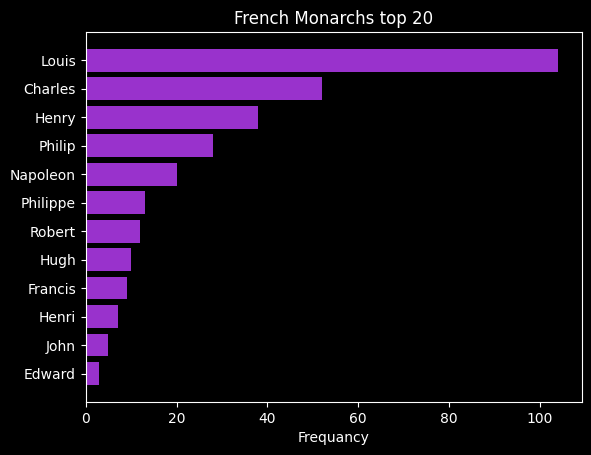

In [68]:
plt.figure(figsize=(15,3))
plt.style.use('dark_background')

fig, ax = plt.subplots()

y_pos = np.arange(len(names_fr))
fr_val = franmon_top_20_names.values()

ax.barh(y_pos, fr_val, align='center',color='darkorchid')
ax.set_yticks(y_pos)
ax.set_yticklabels(names_fr)
ax.invert_yaxis()  
ax.set_xlabel('Frequancy')
ax.set_title('French Monarchs top 20')

Text(0.5, 1.0, 'Russian Monarchs top 20')

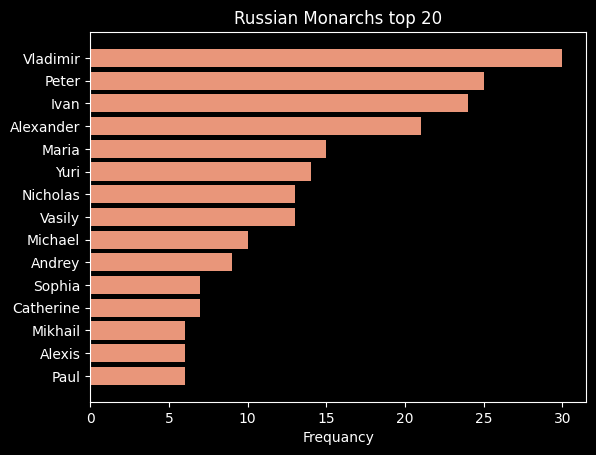

In [69]:

fig, ax = plt.subplots()
y_pos = np.arange(len(names_rus))
ru_val = rusmon_top_20_names.values()

ax.barh(y_pos, ru_val, align='center',color='darksalmon')
ax.set_yticks(y_pos)
ax.set_yticklabels(names_rus)
ax.invert_yaxis()  
ax.set_xlabel('Frequancy')
ax.set_title('Russian Monarchs top 20')

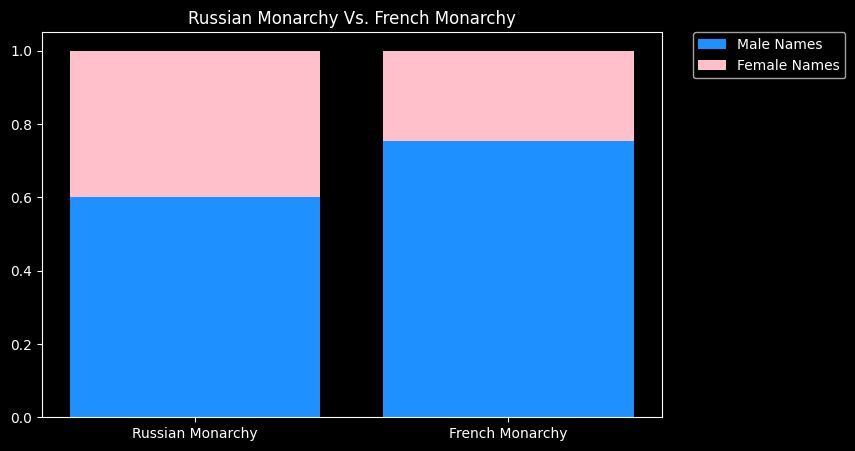

In [70]:
male_rus = rus_male_data.nunique()[0]/rus_data.nunique()[0]
female_rus =  rus_female_data.nunique()[0]/rus_data.nunique()[0]

male_fre = fre_male_data.nunique()[0]/fre_data.nunique()[0]
female_fre =  fre_female_data.nunique()[0]/fre_data.nunique()[0]

colors = ['dodgerblue', 'pink']

plt.figure(figsize=(8,5))
plt.title("Russian Monarchy Vs. French Monarchy")
plt.bar(['Russian Monarchy','French Monarchy'],[male_rus, male_fre],color = colors[0])
plt.bar(['Russian Monarchy','French Monarchy'],[female_rus,female_fre],bottom=[male_rus,male_fre],color = colors[1])
plt.legend(['Male Names','Female Names'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()